In [1]:
import pandas as pd
import os
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pembersihan Data

In [2]:
#Parameter Awal
data_columns = ['Kode Saham', 'Nama Perusahaan', 'Volume', 'Nilai', 'Frekuensi']
data_path = 'data mentah'
files_path = os.listdir(data_path+'/OKTOBER')

#Mengambil dataset saham
df = pd.read_excel(data_path+'/OKTOBER/Ringkasan Saham-20241029.xlsx')
# menghilangkan kolom yang tidak perlu
df = df[data_columns]

In [3]:
#Menampilkan 5 dataset awal
df.head()

,Kode Saham,Nama Perusahaan,Volume,Nilai,Frekuensi
0,AALI,Astra Agro Lestari Tbk.,771400,5213785000,708
1,ABBA,Mahaka Media Tbk.,5224100,159168200,95
2,ABDA,Asuransi Bina Dana Arta Tbk.,0,0,0
3,ABMM,ABM Investama Tbk.,4572900,18011269000,2553
4,ACES,Aspirasi Hidup Indonesia Tbk.,39335400,36202602000,4803


# Pembuatan Model KMeans

In [4]:
#menginisialisasi algoritma KMeans dengan 3 cluster
#Tinggi, Mengengah, dan Rendah
kmeans = KMeans(n_clusters=3)

In [5]:
#Melatih Model menggunakan dataset
kmeans.fit(df[['Volume', 'Nilai', 'Frekuensi']])

/home/user/Kmeans-tutorial-Ping/env/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/user/Kmeans-tutorial-Ping/env/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/nix/store/vvhd7zgrvvfb6576fws25q3bbaqcanba-python3-3.11.10/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nix/store/vvhd7zgrvvfb6576fws25q3bbaqcanba-python3-3.11.10/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_f

KMeans(n_clusters=3)

In [6]:
# mengambil labels
# menambahkan huruf di awal setiap label
labels = list(map(lambda x: 'C'+str(x), kmeans.labels_))

# memasukan label ke dalam dataset
df['Cluster'] = labels

# Visualisasi Data

In [11]:
df

,Kode Saham,Nama Perusahaan,Volume,Nilai,Frekuensi,Cluster
0,AALI,Astra Agro Lestari Tbk.,771400,5213785000,708,C0
1,ABBA,Mahaka Media Tbk.,5224100,159168200,95,C0
2,ABDA,Asuransi Bina Dana Arta Tbk.,0,0,0,C0
3,ABMM,ABM Investama Tbk.,4572900,18011269000,2553,C0
4,ACES,Aspirasi Hidup Indonesia Tbk.,39335400,36202602000,4803,C0
...,...,...,...,...,...,...
936,ZATA,Bersama Zatta Jaya Tbk.,1901400,17367900,54,C0
937,ZBRA,Dosni Roha Indonesia Tbk.,435600,46996600,97,C0
938,ZINC,Kapuas Prima Coal Tbk.,5284900,79293500,108,C0
939,ZONE,Mega Perintis Tbk.,29200,25842000,12,C0


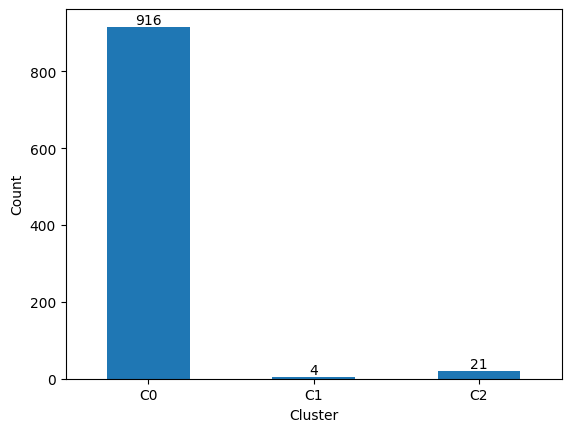

In [20]:
# memvisualisasikan data
ax = df['Cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.title('')
plt.xlabel('Cluster')
plt.ylabel('Count')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')